In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from ISLP import confusion_table
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_json("NBA_player_data.json")

In [3]:
position_mapping = {"PG": 1, "SG": 2, "SF": 3, "PF": 4, "C": 5}

data = data.drop(data.columns[0], axis=1)

In [4]:
features = ["AST","BLK","TRB","STL", "TOV", "FG%","FGA","3P%","2P%"]
target = "Pos"

X = data[features]
y = data[target].map(position_mapping)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)

In [5]:
qda = QDA()

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = qda.fit(X_train_scaled,y_train)

train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

print("Training Accuracy:", train_score)
print("Testing Accuracy:", test_score)

Training Accuracy: 0.6450777202072538
Testing Accuracy: 0.627906976744186


In [12]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_pred, y_test)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.813953488372093


In [7]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
loo = LeaveOneOut()

scores = cross_val_score(model, X, y, cv=loo)

mean_accuracy = scores.mean()

print("Mean Accuracy:", mean_accuracy)
print(scores)

Mean Accuracy: 0.5384615384615384
[0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 0

In [8]:
X_total_scaled = scaler.fit_transform(X)
lda_pred = model.predict(X)
cm = confusion_matrix(y,lda_pred)

c:\Users\14156\.pyenv\pyenv-win\versions\3.11.1\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but QuadraticDiscriminantAnalysis was fitted without feature names
  warnings.warn(


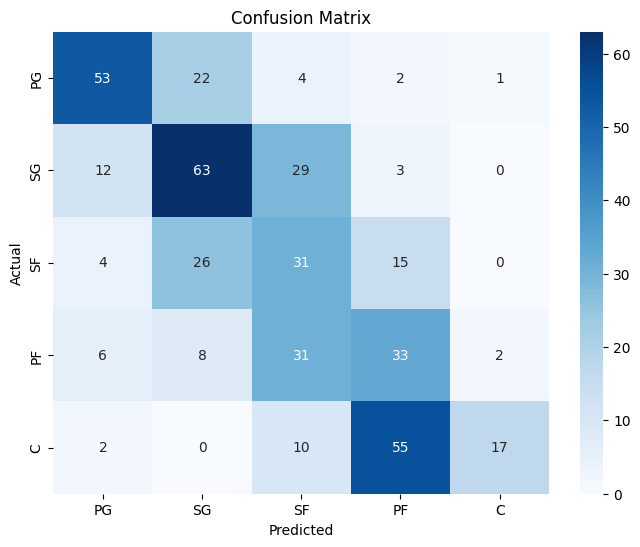

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(position_mapping.keys()), yticklabels=list(position_mapping.keys()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

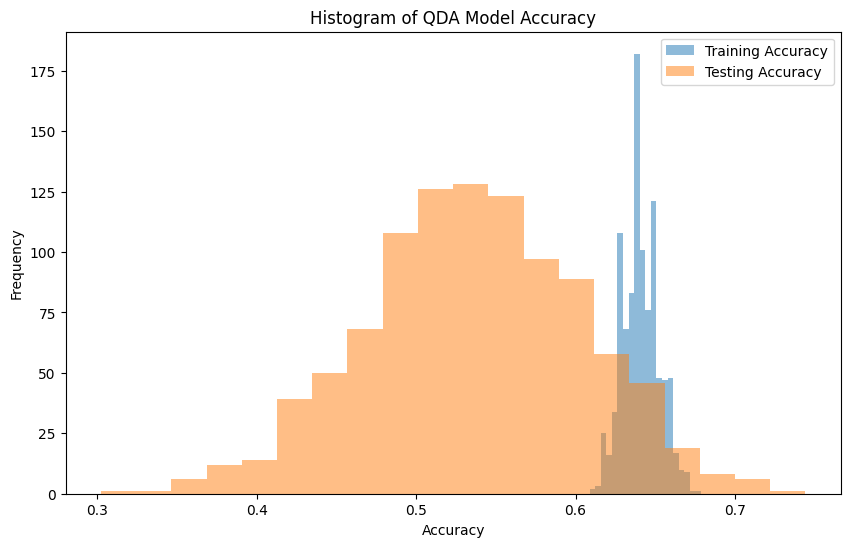

[0.5813953488372093, 0.5116279069767442, 0.5116279069767442, 0.6046511627906976, 0.5348837209302325, 0.6511627906976745, 0.6046511627906976, 0.627906976744186, 0.627906976744186, 0.4883720930232558, 0.5813953488372093, 0.5348837209302325, 0.5348837209302325, 0.627906976744186, 0.6511627906976745, 0.627906976744186, 0.4418604651162791, 0.6046511627906976, 0.4883720930232558, 0.5813953488372093, 0.5581395348837209, 0.6046511627906976, 0.6511627906976745, 0.5116279069767442, 0.4883720930232558, 0.4883720930232558, 0.5813953488372093, 0.4883720930232558, 0.6744186046511628, 0.627906976744186, 0.4883720930232558, 0.4418604651162791, 0.5813953488372093, 0.5581395348837209, 0.4883720930232558, 0.5813953488372093, 0.5581395348837209, 0.4418604651162791, 0.5581395348837209, 0.4883720930232558, 0.5581395348837209, 0.46511627906976744, 0.5348837209302325, 0.5348837209302325, 0.4883720930232558, 0.6744186046511628, 0.6046511627906976, 0.5116279069767442, 0.5581395348837209, 0.6511627906976745, 0.6

In [11]:
#creates the model many times and plots accuracy
train_accuracy_scores = []
test_accuracy_scores = []

for _ in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    qda = QDA()
    model = qda.fit(X_train_scaled, y_train)
    
    train_accuracy = model.score(X_train_scaled, y_train)
    train_accuracy_scores.append(train_accuracy)
    
    test_accuracy = model.score(X_test_scaled, y_test)
    test_accuracy_scores.append(test_accuracy)

plt.figure(figsize=(10, 6))
plt.hist(train_accuracy_scores, bins=20, alpha=0.5, label='Training Accuracy')
plt.hist(test_accuracy_scores, bins=20, alpha=0.5, label='Testing Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Histogram of QDA Model Accuracy')
plt.legend()
plt.show()
print(test_accuracy_scores)
print(train_accuracy_scores)